In [77]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [78]:
#Importing libraries
import pandas as pd
from fredapi import Fred
import requests

# Data Collection

In [94]:
start = '2018-10-01'
end = '2023-10-01'
api_key = "WyIzc4qhpYE6rxEDvB216tCCuvSkHBwGLJ6ddpam"

def retrieve_data(product):
    # Create EIA URL using our API key
    eia_url = 'https://api.eia.gov/v2/petroleum/pri/spt/data/'
    params = '?frequency=daily&data[0]=value&facets[product][]=%s&start=%s&end=%s&sort[0][column]=period&sort[0][direction]=desc&api_key=%s' % (product, start, end, api_key)

    # Fetch the data
    data = requests.get(eia_url + params).json()
    df = pd.DataFrame(data['response']['data'])

    # Returning all necessary columns
    return df[['period', 'product', 'product-name', 'value', 'units']]

In [87]:
# Retrieving data for WTI Crude Oil and Oil products

wti_df = retrieve_data('EPCWTI')
gasoline_df = retrieve_data('EPMRU') # Conventional Regular Gasoline
kerosine_df = retrieve_data('EPJK') # Kerosene-Type Jet Fuel
diesel_df = retrieve_data('EPD2DXL0') # No 2 Diesel Low Sulfur (0-15 ppm)
heating_oil_df = retrieve_data('EPD2F') # No 2 Fuel Oil / Heating Oil
propane_df = retrieve_data('EPLLPA') # Propane

wti_df.head()

,period,product,product-name,value,units
0,2023-09-29,EPCWTI,WTI Crude Oil,90.77,$/BBL
1,2023-09-28,EPCWTI,WTI Crude Oil,91.65,$/BBL
2,2023-09-27,EPCWTI,WTI Crude Oil,93.67,$/BBL
3,2023-09-26,EPCWTI,WTI Crude Oil,91.43,$/BBL
4,2023-09-25,EPCWTI,WTI Crude Oil,89.68,$/BBL


In [95]:
wti_df = retrieve_data('EPCWTI')
wti_df.head()

,period,product,product-name,value,units
0,2023-09-29,EPCWTI,WTI Crude Oil,90.77,$/BBL
1,2023-09-28,EPCWTI,WTI Crude Oil,91.65,$/BBL
2,2023-09-27,EPCWTI,WTI Crude Oil,93.67,$/BBL
3,2023-09-26,EPCWTI,WTI Crude Oil,91.43,$/BBL
4,2023-09-25,EPCWTI,WTI Crude Oil,89.68,$/BBL


In [88]:
#Getting Oil Price for Saudi Arabia from Fred
fred = Fred(api_key='57bd4282521725d9bf0fee73890bbdd7')
saudi_prices = fred.get_series('SAUPZPIOILBEGUSD')
wti_prices = fred.get_series('WTISPLC')


saudi_df = pd.DataFrame(saudi_prices)
saudi_df.columns = ['Price']
saudi_df.head()

,Price
2008-01-01,37.611394
2009-01-01,73.642577
2010-01-01,67.572343
2011-01-01,77.053879
2012-01-01,77.945163


In [89]:
urals_df = pd.read_csv('data/urals_prices.csv', sep=';')
urals_df.head()

,09.11.2023,68.46
0,08.11.2023,68.41
1,07.11.2023,70.46
2,06.11.2023,74.04
3,03.11.2023,73.80
4,02.11.2023,74.46


<AxesSubplot:>

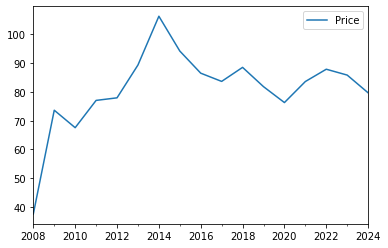

In [90]:
#Plotting
saudi_df.plot()

<AxesSubplot:>

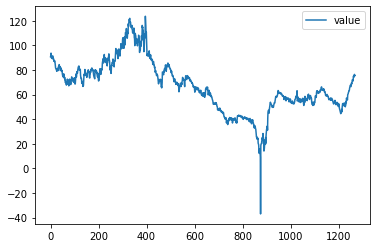

In [91]:
wti_df.plot()

<AxesSubplot:>

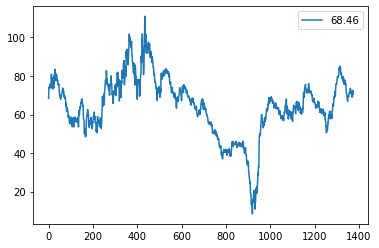

In [93]:
urals_df.plot()